<a href="https://colab.research.google.com/github/mbraddy/CAP4630-AI/blob/master/hw2/CAP4630_Braddy_HW2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_goodfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Droupout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Droupout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Droupout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_goodfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
epochs = 5
history_under = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5577 - acc: 0.8102 - val_loss: 0.4587 - val_acc: 0.8407
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4223 - acc: 0.8515 - val_loss: 0.4225 - val_acc: 0.8510
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3938 - acc: 0.8601 - val_loss: 0.4208 - val_acc: 0.8513
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3724 - acc: 0.8673 - val_loss: 0.4036 - val_acc: 0.8553
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3580 - acc: 0.8727 - val_loss: 0.3898 - val_acc: 0.8610


In [36]:
epochs = 20
history_over = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/sample - loss: 0.1886 - acc: 0.9313 - val_loss: 0.3746 - val_acc: 0.8844
Epoch 2/20
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1815 - acc: 0.9322 - val_loss: 0.3648 - val_acc: 0.8898
Epoch 3/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1769 - acc: 0.9326 - val_loss: 0.3775 - val_acc: 0.8885
Epoch 4/20
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1748 - acc: 0.9341 - val_loss: 0.3997 - val_acc: 0.8882
Epoch 5/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1700 - acc: 0.9357 - val_loss: 0.3911 - val_acc: 0.8899
Epoch 6/20
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1694 - acc: 0.9359 - val_loss: 0.3947 - val_acc: 0.8898
Epoch 7/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1611 - acc: 0.9390 

In [37]:
epochs = 10
history_good = model_goodfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.4848 - acc: 0.8262 - val_loss: 0.4196 - val_acc: 0.8477
Epoch 2/15
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3621 - acc: 0.8660 - val_loss: 0.4078 - val_acc: 0.8531
Epoch 3/15
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3274 - acc: 0.8796 - val_loss: 0.3774 - val_acc: 0.8693
Epoch 4/15
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3032 - acc: 0.8875 - val_loss: 0.3510 - val_acc: 0.8752
Epoch 5/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2886 - acc: 0.8922 - val_loss: 0.3472 - val_acc: 0.8774
Epoch 6/15
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2727 - acc: 0.8979 - val_loss: 0.3340 - val_acc: 0.8794
Epoch 7/15
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2598 - acc: 0.9021 - 

Underfit Plots

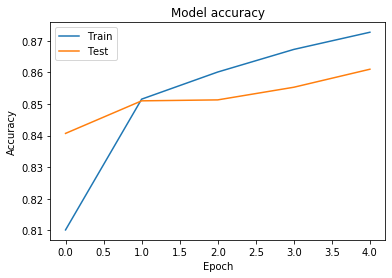

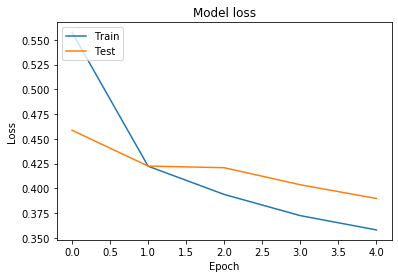

In [38]:
# Plot training & validation accuracy values
plt.plot(history_under.history['acc'])
plt.plot(history_under.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_under.history['loss'])
plt.plot(history_under.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Overfit Plots

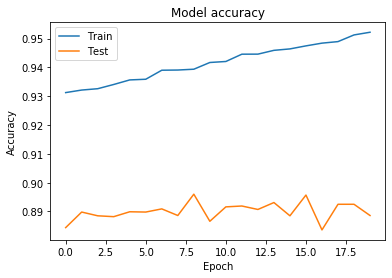

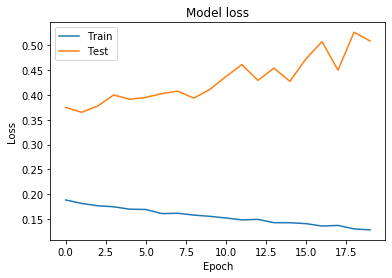

In [39]:
# Plot training & validation accuracy values
plt.plot(history_over.history['acc'])
plt.plot(history_over.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_over.history['loss'])
plt.plot(history_over.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Good Fit Plots

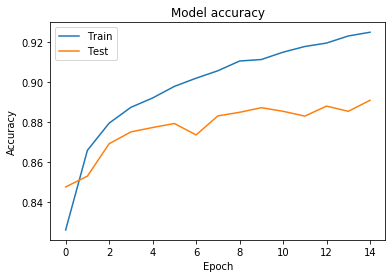

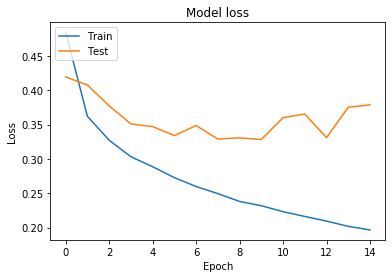

In [40]:
# Plot training & validation accuracy values
plt.plot(history_good.history['acc'])
plt.plot(history_good.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_good.history['loss'])
plt.plot(history_good.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()